In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import sys
import nolds as ns
import numba
from numba import njit
from numba.typed import List
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
sys.path.insert(0, "D:/GIUSEPPE/Universita/TesiMagistrale/Kuramoto/Codice/modified")
%load_ext autoreload
%autoreload 2
from kuramoto.plotting import *
from kuramoto.plotting_dm import *
from kuramoto.kuramoto_com_multi import *

In [8]:
# Parameters
dt = 0.01 # time step
t_max = 200 # max time of the simulation
n_steps = int(t_max/dt)
A = 1
B = 2 # when the internal coupling is 0 there is chaotic behavior for B=5, periodic for lower values, such as B=2.5
# First network
N1 = 1000 # number of nodes
coupling1 = 0.2 # coupling between oscillators (will be normalized by the number of interactions)
omega_f = 1.0 # frequence of the external field
n = 2
delta = 1

# Second network
N2 = 1000
coupling2 = 0.2


# Creation of the graphs
# graph_nx1 = nx.complete_graph(N1)
# graph_nx2 = nx.complete_graph(N2)
graph_nx1 = nx.erdos_renyi_graph(n = N1, p = 6/(N1-1), directed = False); title1 = 'Erdos-Renyi'
graph_nx2 = nx.erdos_renyi_graph(n = N2, p = 6/(N2-1), directed = False); title2 = 'Erdos-Renyi'

# graph_nx1 = nx.barabasi_albert_graph(N1, m = 3); title1 = 'Barabasi-Albert'
# graph_nx2 = nx.barabasi_albert_graph(N2, m = 3); title2 = 'Barabasi-Albert'

graph1 = nx.to_numpy_array(graph_nx1)
graph2 = nx.to_numpy_array(graph_nx2)
model = Kuramoto_com(coupling1=coupling1, coupling2 = coupling2, dt=dt, t_max=t_max, n_nodes1=len(graph1),
                     n_nodes2=len(graph2), omega_f = omega_f, A = A, B = B, n = n, delta = delta)

In [9]:
print(f'Initial parameters \n')
print(f'n = {n}')
print(f'number of nodes: N1 = {N1}, N2 = {N2}')
print(f'coupling: c1 = {coupling1}, c2 = {coupling2}')
print(f'A = {A}')
print(f'B = {B}')
print(f'external frequency = {omega_f}')
print(f'time step dt = {dt}')
print(f'number of temporal steps {n_steps}')
act_mat = model.run(adj_mat1 = graph1, adj_mat2 = graph2)
ord1 = [Kuramoto.phase_coherence(vec) for vec in act_mat[:N1].T]
ord2 = [Kuramoto.phase_coherence(vec) for vec in act_mat[N1:N1+N2].T]

Initial parameters 

n = 2
number of nodes: N1 = 1000, N2 = 1000
coupling: c1 = 0.2, c2 = 0.2
A = 1
B = 2
external frequency = 1.0
time step dt = 0.01
number of temporal steps 20000


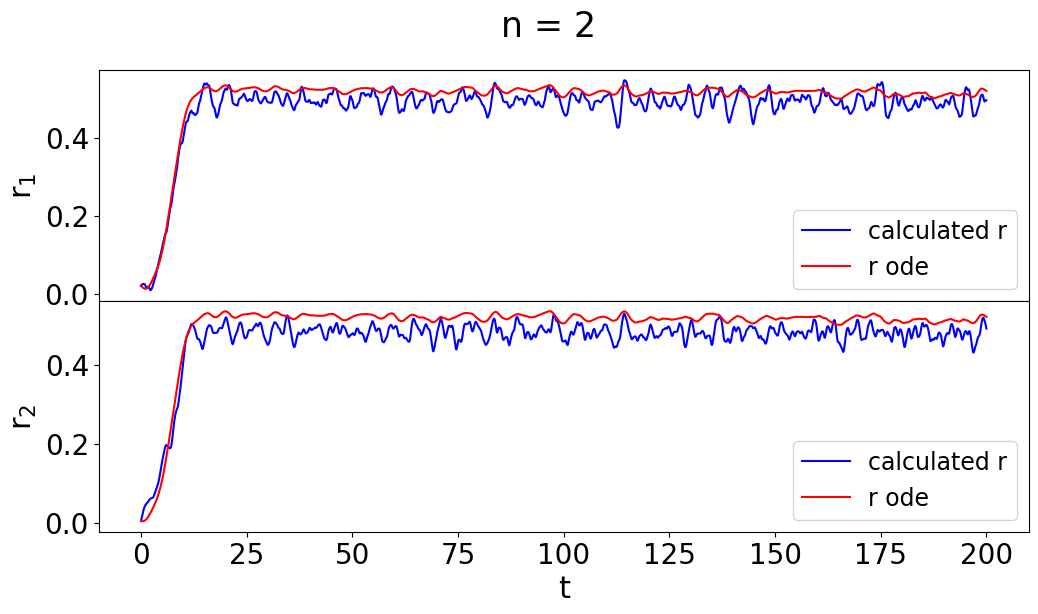

In [10]:
b = act_mat[-1]
r1 = np.abs(act_mat[-4] + act_mat[-5])
r2 = np.abs(act_mat[-2] + act_mat[-3])
# r1 = np.abs(act_mat[-6] + act_mat[-7] + act_mat[-8] + act_mat[-9])
# r2 = np.abs(act_mat[-2] + act_mat[-3] + act_mat[-4] + act_mat[-5])
# beta = 0.5
# r1_d = global_order_param(act_mat[:N1], graph1, n_steps, beta)
# r2_d = global_order_param(act_mat[N1:N1+N2], graph2, n_steps, beta)

#plot_field_order_two(b, ord1, ord2, r1, r2, dt, t_max, title = f'A = {A}, B = {B}, c1 = {coupling1}, c2 = {coupling2}')
plot_order_parameters(ord1, r1, ord2, r2, dt, t_max, f'n = {n}', leg = True)
# plot_field(b, dt, t_max)
# plot_order_parameters(r1, ord1, r2, ord2, dt, t_max, title = f'A = {A}, B = {B}, c1 = {coupling1}, c2 = {coupling2}')
# plot_diff_r(r1, ord1, r2, ord2, dt, t_max, title = f'A = {A}, B = {B}, c1 = {coupling1}, c2 = {coupling2}')

# plot_all(act_mat[:N1], act_mat[N1:N1+N2], ord1, ord2, act_mat[-1], dt, t_max)

C:\Users\gacqu\AppData\Local\Temp\ipykernel_18668\1513022530.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi[i] = mutual_info_regression(y, x, n_neighbors=100)
C:\Users\gacqu\AppData\Local\Temp\ipykernel_18668\1513022530.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi[i] = mutual_info_regression(y, x, n_neighbors=100)
C:\Users\gacqu\AppData\Local\Temp\ipykernel_18668\1513022530.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi[i] = mutual_info_re

The first minimum is at 231


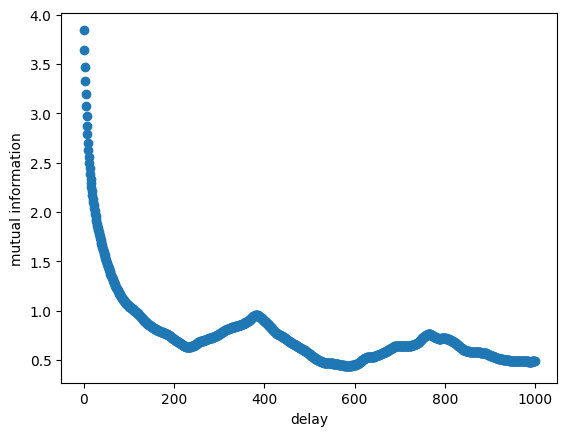

In [5]:
def m_inf(f, delay):
    mi = np.empty(len(delay))
    for i in range(len(delay)):
        x = f[: len(f) - delay[i]]
        #x = x.reshape(-1,1)
        y = f[delay[i]: len(f)]
        y = y.reshape(-1,1)
        mi[i] = mutual_info_regression(y, x, n_neighbors=100)
    return mi
# Delay
max_d = 1000
delay = np.arange(max_d)
mi = m_inf(np.array(r1[300:]), delay)

for i in range(1, max_d - 1):
    if mi[i]<mi[i-1] and mi[i]<mi[i+1]:
        minima = i
        break
print(f'The first minimum is at {minima}')
# for i in range(max_d):
#     print(delay[i], mi[i])
plt.scatter(delay, mi)
plt.xlabel('delay')
plt.ylabel('mutual information')
plt.show()

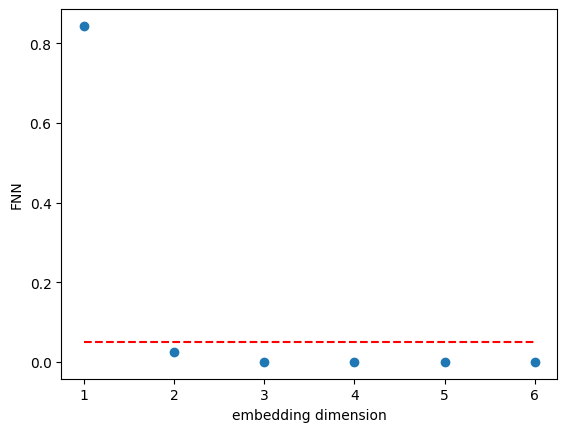

In [6]:
def psr_deneme(x, m, tau, npoint=None):
    """
    Phase space reconstruction.
    :param x: Time series
    :param m: Embedding dimension
    :param tau: Time delay
    :param npoint: Total number of reconstructed vectors
    :return: Reconstructed phase space matrix Y (M x m)
    """
    N = len(x)
    if npoint is None:
        M = N - (m - 1) * tau
    else:
        M = npoint
    
    Y = np.zeros((M, m))
    for i in range(m):
        Y[:, i] = x[i * tau:M + i * tau]
    
    return Y
def f_fnn(x, tau, mmax, rtol=15, atol=2):
    """
    Computes the False Nearest Neighbors (FNN) method for determining the minimum embedding dimension.
    Reference: M. B. Kennel, R. Brown, and H. D. I. Abarbanel, Phys. Rev. A 45, 3403 (1992).
    :param x: Time series
    :param tau: Time delay
    :param mmax: Maximum embedding dimension
    :param rtol: Relative tolerance threshold
    :param atol: Absolute tolerance threshold
    :return: Percentage of false nearest neighbors for each embedding dimension
    """
    N = len(x)
    Ra = np.std(x)
    FNN = np.zeros(mmax)
    
    for m in range(1, mmax + 1):
        M = N - m * tau
        Y = psr_deneme(x, m, tau, M)
        
        for n in range(M):
            y0 = np.tile(Y[n, :], (M, 1))
            distance = np.sqrt(np.sum((Y - y0) ** 2, axis=1))
            sorted_indices = np.argsort(distance)
            nearest_neighbor_index = sorted_indices[1]  # First nearest neighbor
            
            D = np.abs(x[n + m * tau] - x[nearest_neighbor_index + m * tau])
            R = np.sqrt(D ** 2 + distance[nearest_neighbor_index] ** 2)
            
            if D / distance[nearest_neighbor_index] > rtol or R / Ra > atol:
                FNN[m - 1] += 1
    
    FNN = (FNN/N)

    return FNN
max_dimension = 6
lag = minima
rtol = 20
atol = 2

fnn = f_fnn(r1, lag, max_dimension, rtol, atol)
plt.scatter(range(1, max_dimension + 1), fnn)
plt.xlabel('embedding dimension')
plt.ylabel('FNN')
plt.hlines(0.05, 1, max_dimension, colors = 'red', linestyles='--')
plt.show()

d:\Programmi\Python312\Lib\site-packages\nolds\measures.py:254: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 750
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


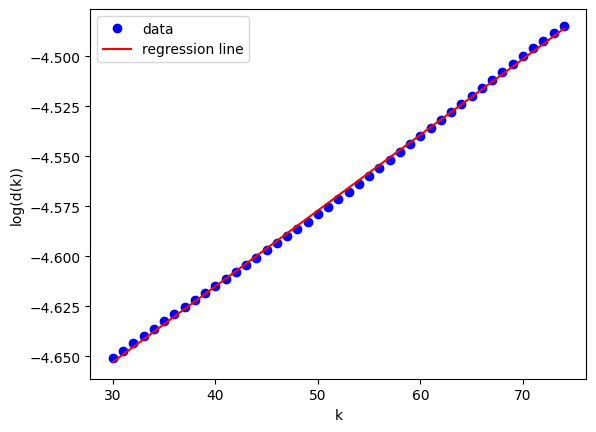

Lyapunov exponent 0.37898855837352824


In [10]:
lyap_h =ns.lyap_r(r1[2000:], emb_dim = 4, lag=minima, debug_plot=True, tau = 0.01, trajectory_len = 75, fit_offset = 30)
print(f'Lyapunov exponent {lyap_h}')

In [ ]:
file1 = open("test_r_er.txt", "w") 
file2 = open("test_r_ba.txt", "w") 
file3 = open("test_b.txt", "w") 

for i in range(len(ord1)):    
    file1.write(str(format(ord1[i], '.8f'))+ ' ')
    file2.write(str(format(ord2[i], '.8f')) + ' ')
    file3.write(str(format(b[i], '.8f')) + ' ')


file1.close()
file2.close()
file3.close()

In [ ]:
f1 = np.genfromtxt("test_r_er.txt")
# f2 = np.genfromtxt("test_r_ba.txt") 
# f3 = np.genfromtxt("test_b.txt") 
#plot_field_order(f3, f1, f2, dt, t_max, title = None)print(ns.lyap_r(f1))
print(ns.lyap_r(f1))
#print(ns.lyap_e(f1))

In [ ]:
N1 = 3
N2 = 3
graph_nx1 = nx.erdos_renyi_graph(n = N1, p = 0.8, directed = False)
graph_nx2 = nx.erdos_renyi_graph(n = N1, p = 0.8, directed = False)
adj_mat1 = nx.to_numpy_array(graph_nx1)
adj_mat2 = nx.to_numpy_array(graph_nx2)
# angles_vec1 = 2 * np.pi * np.random.random(size = N1)
# angles_vec2 = 2 * np.pi * np.random.normal(size = N2)
angles_vec1 = [0, np.pi/3, np.pi/4]
angles_vec2 = [np.pi/2, np.pi/6, np.pi/5]
coupling1 = 0.5
coupling2 = 0.2
A = 2
B = 3
t = 0.01
omega_f = 0.3
J = np.zeros((N1+N2+1, N1+N2+1))
for i in range(N1):
    for j in range(N1):
        if i == j:
            for k in range(N1):
                if k!=i:
                    J[i,j] -= coupling1*adj_mat1[i,k]*np.cos(angles_vec1[k] - angles_vec1[i])
        else:
            J[i,j] = coupling1*adj_mat1[i,j]* np.cos(angles_vec1[j] - angles_vec1[i])
for i in range(N2):
    for j in range(N2):
        if i == j:
            for k in range(N2):
                if k!=i:
                    J[N1+i,N1+j] -= coupling2*adj_mat2[i,k]*np.cos(angles_vec2[k] - angles_vec2[i])
        else:
            J[N1+i,N1+j] = coupling2*adj_mat2[i,j]* np.cos(angles_vec2[j] - angles_vec2[i])
for i in range(N1):
    J[N1+N2, i] = -A*np.abs(1j*np.exp(1j*angles_vec1[i]))/N1 + B*np.abs(1j*np.sum(np.exp(1j*(angles_vec1[i] - angles_vec2[j])) for j in range(N2)))/(N1*N2)
    J[i, N1+N2] = np.sin(omega_f*t - angles_vec1[i])
for i in range(N2):
    J[N1+N2, N1+i] = -A*np.abs(1j*np.exp(1j*angles_vec2[i]))/N2 + B*np.abs(-1j*np.sum(np.exp(1j*(angles_vec1[j] - angles_vec2[i])) for j in range(N1)))/(N1*N2)
    J[N1+i, N1+N2] = np.sin(omega_f*t - angles_vec2[i])


In [ ]:
#ord1 = [Kuramoto.phase_coherence(vec) for vec in act_mat[:N1].T]
#ord2 = [Kuramoto.phase_coherence(vec) for vec in act_mat[N1:N1+N2].T]
#plot_field(act_mat[-1], dt, t_max)
#plot_both(act_mat[:N1], dt, t_max, title = 'First network')
#plot_both(act_mat[N1:N1+N2], dt, t_max, title = 'Second network')
#plot_all(act_mat[:N1], act_mat[N1:N1+N2], ord1, ord2, act_mat[-1], dt, t_max)
#plt.savefig(f't_low6.png')

In [ ]:
@jit(nopython=True)
def neighbors(series):
    dlist=[] 
    for i in range(N):
        dlist.append([0.0])
    n=0 #number of nearby pairs found
    for i in range(N):
        for j in range(i+1,N):
            if np.abs(series[i]-series[j]) < eps:
                n+=1
                for k in range(min(N-i,N-j)):
                    if np.abs(series[i+k]-series[j+k]) > 1e-20: # to avoid have distance = 0 since log(0) diverges
                        dlist[k].append(np.log(np.abs(series[i+k]-series[j+k])))
    return dlist
f=open('test_r_er.txt', 'r')
series=[float(i) for i in f.read().split()]
series = series[59000:]
print(len(series))
f.close()
N=len(series)
eps=0.05
dlist = neighbors(series)

In [ ]:
f=open('lyapunov.txt','w')
for i in range(len(dlist)):
    if len(dlist[i]):
        f.write(str(i) +' ' + str(sum(dlist[i])/len(dlist[i])) + '\n')
f.close()

In [ ]:
file = np.genfromtxt('lyapunov.txt')
x = file[:,0]
y = file[:,1]
plt.plot(x,y)